In [1]:
import pandas as pd
from clean_crash_data import crash_data

c:\Users\Ern\Documents\projects\cincy_traffic\clean_crash_data.py:4: DtypeWarning: Columns (8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_raw = pd.read_csv("Traffic_Crash_Reports__CPD_.csv")
c:\Users\Ern\Documents\projects\cincy_traffic\clean_crash_data.py:10: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  crash_data.loc[:, 'CRASHDATE'] = pd.to_datetime(crash_data.CRASHDATE)
c:\Users\Ern\Documents\projects\cincy_traffic\clean_crash_data.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  crash_data.loc[:, 'DA

# Where are crashes happening most frequently?

In [2]:
crash_data[['LOCALREPORTNO', 'ADDRESS_X']].groupby('ADDRESS_X').nunique()

,LOCALREPORTNO
ADDRESS_X,
% N I75 AT 2.7%,1
0-X W 562 AT I75,4
0-X W NORWOOD LATERAL,9
0.0X S I71 EX,1
0.X E NORWOOD LATERAL,7
...,...
XX WILLIAM HOWARD,2
XX WILLIAM HOWARD TAFT,19
XX WILLIAM HOWARD TAFT RD,156


It looks like there are very few locations where there are more than 100 traffic incidents.

In [3]:
crash_data.ADDRESS_X.nunique()

13246

In [4]:
# crash_data[['LOCALREPORTNO', 'ADDRESS_X']].groupby('ADDRESS_X').nunique().plot(kind='bar')

There are 13,573 unique addresses out of 328,558 records / 169,706 reports.

In [5]:
addr_incs = crash_data[['ADDRESS_X', 'LOCALREPORTNO']]

In [6]:
addr_incs_grp = addr_incs.groupby('ADDRESS_X').nunique().sort_values(by='LOCALREPORTNO', ascending=False)

In [7]:
# addr_incs_grp.plot(kind='bar')

In [8]:
addr_incs_grp.describe()

,LOCALREPORTNO
count,13246.000000
mean,12.810735
std,30.362231
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,700.000000


While most addresses have 10 or fewer crashes over the last decade, the most crashes that have occurred at a single address is 575! Let's look at the top 25%.

In [9]:
top_qtr = addr_incs_grp.loc[addr_incs_grp.LOCALREPORTNO > 10]

In [10]:
top_qtr_data = crash_data[crash_data.ADDRESS_X.isin(top_qtr.index)]

In [11]:
top_qtr_data.LOCALREPORTNO.nunique()

141683

In [12]:
top_qtr_crashes = top_qtr_data.groupby('ADDRESS_X').nunique().sort_values(by='LOCALREPORTNO', ascending=False)['LOCALREPORTNO']

In [13]:
top_qtr_crashes[0:10]

ADDRESS_X
W MITCHELL AVE        700
2XX W MITCHELL AVE    575
1XX W MITCHELL AVE    483
61XX GLENWAY AVE      472
2XX CALHOUN ST        404
44XX COLERAIN AVE     399
49XX GLENWAY AVE      375
16XX WESTWOOD AVE     368
35XX READING RD       352
39XX VINE ST          350
Name: LOCALREPORTNO, dtype: int64

<AxesSubplot: ylabel='Frequency'>

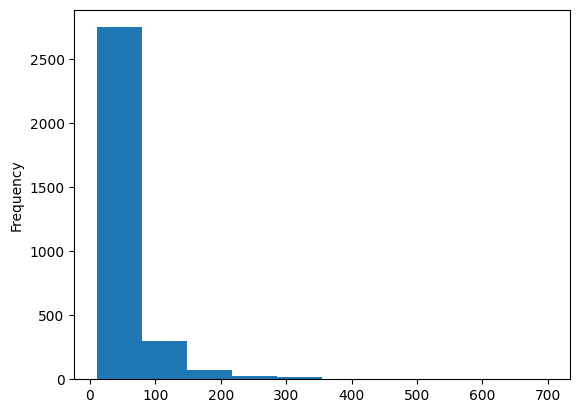

In [16]:
top_qtr_crashes.plot(kind='hist')

2XX W Mitchell Avenue is the location with 575 crashes. Interestingly, 1XX W Mitchell Avenue is the next highest at 483 crashes.

In [14]:
len(top_qtr_crashes)

3172

3,204 addresses make up the top quarter of crashes. Streets would be a more useful measure (but there might be different clusters on the same street)

# Crashes by Street

In [16]:
data_by_st = crash_data
data_by_st['STREET'] = data_by_st.ADDRESS_X.str.replace('^\d+X+ ', '', regex=True)

In [17]:
data_by_st.STREET

0         S I75 AT 2-7 MM
1            E LIBERTY ST
2            E LIBERTY ST
3             CENTRAL AVE
4             CENTRAL AVE
               ...       
328553        SYCAMORE ST
328554          WALNUT ST
328555          WALNUT ST
328556       HARRISON AVE
328557       HARRISON AVE
Name: STREET, Length: 328558, dtype: object

In [18]:
data_by_st.STREET.nunique()

6436

There are about 6,446 unique streets with car crashes.

In [19]:
data_by_st.describe()

,LATITUDE_X,LONGITUDE_X,AGE,CRASHSEVERITY,INJURIES,MANNEROFCRASH,ROADCONTOUR,ROADSURFACE,ROADCLASS,LIGHTCONDITIONS,ROADCONDITIONS
count,3.285290e+05,3.285270e+05,287961.000000,328551.0,328250.0,328537.0,328537.0,328537.0,203133.000000,328537.0,328537.0
mean,2.633354e+03,-1.199095e+04,37.465070,3.481904,2.663829,4.262655,1.469451,1.853091,2.825745,1.79539,1.551956
std,1.469781e+06,6.819152e+06,16.585971,1.080332,1.837182,2.441715,0.857321,0.408198,1.484126,1.336644,4.998746
min,-8.449023e+01,-3.908552e+09,0.000000,1.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0
25%,3.911740e+01,-8.454953e+01,24.000000,3.0,1.0,2.0,1.0,2.0,2.000000,1.0,1.0
50%,3.913663e+01,-8.451502e+01,34.000000,3.0,1.0,6.0,1.0,2.0,2.000000,1.0,1.0
75%,3.916096e+01,-8.448473e+01,49.000000,5.0,5.0,6.0,2.0,2.0,4.000000,3.0,1.0
max,8.424329e+08,1.000000e-03,933.000000,5.0,5.0,9.0,9.0,9.0,10.000000,9.0,99.0


In [20]:
data_by_st.groupby(by='STREET').nunique().sort_values(by='LOCALREPORTNO', ascending=False).LOCALREPORTNO

STREET
READING RD           7341
GLENWAY AVE          5378
VINE ST              4698
HARRISON AVE         2988
COLERAIN AVE         2639
                     ... 
OBERLIN BOULEVARD       1
OBRYON                  1
OBSERVATORY DR          1
BOYD                    1
  VINE ST               1
Name: LOCALREPORTNO, Length: 6436, dtype: int64

When grouped by street rather than address, Reading Rd has the most crashes, with Glenway second.

## Map Test

In [17]:
import plotly.io as pio
import plotly.express as px 

In [18]:
pio.renderers.default = 'browser'

In [22]:
top_qtr_crashes.index.str.replace('^\d+X+ ', '', regex=True)

Index(['W MITCHELL AVE', 'W MITCHELL AVE', 'W MITCHELL AVE', 'GLENWAY AVE',
       'CALHOUN ST', 'COLERAIN AVE', 'GLENWAY AVE', 'WESTWOOD AVE',
       'READING RD', 'VINE ST',
       ...
       'LOSANTIVILLE AVE', 'GLENDORA AVE', 'W 2ND ST', 'EUCLID AVE', 'CLIFTON',
       'WINSLOW AVE', 'SIDNEY AVE', 'ORLAND AVE', 'W I74 AT 17-3 MM',
       'KELLOGG AVE'],
      dtype='object', name='ADDRESS_X', length=3172)

In [19]:
# Get the street names from the top quarter crashes
top_qtr_sts = top_qtr_crashes.index.str.replace('^\d+X+ ', '', regex=True)
# Filter crash data to the top quarter streets 
data_from_top_qtr_sts = crash_data[crash_data.ADDRESS_X.str.replace('^\d+X+ ', '', regex=True).isin(top_qtr_sts)]

In [23]:
data_from_top_qtr_sts.LOCALREPORTNO = data_from_top_qtr_sts.LOCALREPORTNO.astype(str)

C:\Users\Ern\AppData\Local\Temp\ipykernel_18268\1575582982.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
fig = px.scatter_mapbox(data_from_top_qtr_sts, 
                        lat="LATITUDE_X", 
                        lon="LONGITUDE_X", 
                        hover_name="LOCALREPORTNO", 
                        hover_data=["LOCALREPORTNO", "CRASHDATE"],
                        color="INJURIESDESCR",
                        # color_continuous_scale=color_scale,
                        # size="Listed",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# W Mitchell Ave

In [27]:
w_mitchell_avenue = crash_data[crash_data['ADDRESS_X'].str.contains('W MITCHELL AV', case=False, na=False)]

In [28]:
w_mitchell_avenue.groupby(by='ADDRESS_X').nunique().sort_values(by='LOCALREPORTNO', ascending=False).LOCALREPORTNO

ADDRESS_X
W MITCHELL AVE         700
2XX W MITCHELL AVE     575
1XX W MITCHELL AVE     483
XX W MITCHELL AVE      260
X W MITCHELL AVE       101
45XX W MITCHELL AVE     54
44XX W MITCHELL AVE     52
3XX W MITCHELL AVE      24
46XX W MITCHELL AVE      8
2XX  W MITCHELL AVE      1
47XX W MITCHELL AVE      1
4XX W MITCHELL AVE       1
Name: LOCALREPORTNO, dtype: int64

Google Maps From 4600 W Mitchell Ave to 1 W Mitchell Ave
https://www.google.com/maps/dir/1+W+Mitchell+Ave,+Cincinnati,+OH+45217/4600+W+Mitchell+Ave,+Cincinnati,+OH+45232/@39.1661648,-84.5191883,15z/data=!3m1!4b1!4m13!4m12!1m5!1m1!1s0x8841b36d88f31241:0x8e4b4ba441fad80e!2m2!1d-84.5044751!2d39.1603458!1m5!1m1!1s0x8841b35d97dc6419:0xb01843254e6d7e95!2m2!1d-84.5149961!2d39.1719619

In [29]:
crashes_on_w_mitchell = w_mitchell_avenue.LOCALREPORTNO.nunique()

In [30]:
crashes_on_w_mitchell

2260

In [31]:
crashes_on_w_mitchell / crash_data.LOCALREPORTNO.nunique()

0.013317148480313012

W Mitchell Avenue accounts for .96% of crashes over the last decade, so that doesn't sound extreme.

# Glenway ave

In [32]:
glenway_ave = crash_data[crash_data['ADDRESS_X'].str.contains('GLENWAY', case=False, na=False)]

In [33]:
crashes_on_glenway = glenway_ave.LOCALREPORTNO.nunique()

In [34]:
crashes_on_glenway

5381

There are actually more crashes that occur on Glenway Avenue than W Mitchell Ave.

In [35]:
glenway_ave.groupby(by='ADDRESS_X').nunique().sort_values(by='LOCALREPORTNO', ascending=False).LOCALREPORTNO

ADDRESS_X
61XX GLENWAY AVE     472
49XX GLENWAY AVE     375
53XX GLENWAY AVE     251
60XX GLENWAY AVE     237
48XX GLENWAY AVE     225
55XX GLENWAY AVE     204
45XX GLENWAY AVE     190
52XX GLENWAY AVE     189
42XX GLENWAY AVE     183
38XX GLENWAY AVE     181
37XX GLENWAY AVE     168
41XX GLENWAY AVE     167
51XX GLENWAY AVE     162
57XX GLENWAY AVE     158
54XX GLENWAY AVE     155
62XX GLENWAY AVE     151
40XX GLENWAY AVE     146
30XX GLENWAY AVE     139
46XX GLENWAY AVE     124
58XX GLENWAY AVE     124
39XX GLENWAY AVE     123
59XX GLENWAY AVE     122
50XX GLENWAY AVE     120
44XX GLENWAY AVE     115
29XX GLENWAY AVE     113
23XX GLENWAY AVE      88
56XX GLENWAY AVE      76
43XX GLENWAY AVE      74
33XX GLENWAY AVE      72
47XX GLENWAY AVE      69
36XX GLENWAY AVE      66
34XX GLENWAY AVE      65
35XX GLENWAY AVE      59
24XX GLENWAY AVE      52
32XX GLENWAY AVE      42
63XX GLENWAY AVE      30
25XX GLENWAY AVE      28
26XX GLENWAY AVE      22
27XX GLENWAY AVE      17
28XX GLENWAY AV

In [36]:
crashes_on_glenway / crash_data.LOCALREPORTNO.nunique()

0.03170777697901076

Crashes on Glenway Avenue account for 3.55% of all crashes.

In [37]:
top_qtr_crashes.filter(regex='GLENWAY').sort_index()

ADDRESS_X
23XX GLENWAY AVE     88
24XX GLENWAY AVE     52
25XX GLENWAY AVE     28
26XX GLENWAY AVE     22
27XX GLENWAY AVE     17
28XX GLENWAY AVE     14
29XX GLENWAY AVE    113
30XX GLENWAY AVE    139
32XX GLENWAY AVE     42
33XX GLENWAY AVE     72
34XX GLENWAY AVE     65
35XX GLENWAY AVE     59
36XX GLENWAY AVE     66
37XX GLENWAY AVE    168
38XX GLENWAY AVE    181
39XX GLENWAY AVE    123
40XX GLENWAY AVE    146
41XX GLENWAY AVE    167
42XX GLENWAY AVE    183
43XX GLENWAY AVE     74
44XX GLENWAY AVE    115
45XX GLENWAY AVE    190
46XX GLENWAY AVE    124
47XX GLENWAY AVE     69
48XX GLENWAY AVE    225
49XX GLENWAY AVE    375
50XX GLENWAY AVE    120
51XX GLENWAY AVE    162
52XX GLENWAY AVE    189
53XX GLENWAY AVE    251
54XX GLENWAY AVE    155
55XX GLENWAY AVE    204
56XX GLENWAY AVE     76
57XX GLENWAY AVE    158
58XX GLENWAY AVE    124
59XX GLENWAY AVE    122
60XX GLENWAY AVE    237
61XX GLENWAY AVE    472
62XX GLENWAY AVE    151
63XX GLENWAY AVE     30
Name: LOCALREPORTNO, dtype: in

Glenway Avenue-- it's a pretty big strip, maybe separating into clusters would be more useful. https://www.google.com/maps/dir/6300+Glenway+Ave,+Cincinnati,+OH+45211/2300+Glenway+Ave,+Cincinnati,+OH+45204/@39.1250156,-84.6122592,13z/data=!4m13!4m12!1m5!1m1!1s0x8841ca6665f3b8a9:0xb7a4b0818c4ab315!2m2!1d-84.6227301!2d39.1472094!1m5!1m1!1s0x8841b6834b810fab:0x2e34cd800837f19b!2m2!1d-84.5537986!2d39.105488

In [38]:
top_qtr_crashes

ADDRESS_X
W MITCHELL AVE        700
2XX W MITCHELL AVE    575
1XX W MITCHELL AVE    483
61XX GLENWAY AVE      472
2XX CALHOUN ST        404
                     ... 
28XX WINSLOW AVE       11
28XX SIDNEY AVE        11
28XX ORLAND AVE        11
W I74 AT 17-3 MM       11
39XX KELLOGG AVE       11
Name: LOCALREPORTNO, Length: 3172, dtype: int64

# Reading Road

In [39]:
crash_data[crash_data.ADDRESS_X.str.contains('READING$', regex=True, na=False)].ADDRESS_X.unique()

array([], dtype=object)

In [40]:
crashes_on_reading = crash_data[crash_data.ADDRESS_X.str.contains('READING', na=False)]

In [41]:
num_crashes_on_reading = crashes_on_reading.groupby('ADDRESS_X').nunique().sort_values(by='LOCALREPORTNO', ascending=False).LOCALREPORTNO

In [42]:
num_crashes_on_reading.sort_index()[120:]

Series([], Name: LOCALREPORTNO, dtype: int64)